In [3]:
import pandas as pd

# Load dataset
file_path = "HR_Analytics.csv.csv"
df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Overview:")
print(df.info())

# Display first few rows
print("\nSample Data:")
print(df.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLev

In [4]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Generate numeric summary
numeric_summary = df[numeric_cols].describe().transpose()

# Display numeric statistics
print("\nNumeric Data Summary:")
print(numeric_summary)


Numeric Data Summary:
                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome    

In [5]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Generate categorical summary
categorical_summary = pd.DataFrame({
    "Column Name": categorical_cols,
    "Unique Values": [df[col].nunique() for col in categorical_cols],
    "Most Frequent Values": [df[col].value_counts().nlargest(3).to_dict() for col in categorical_cols],
    "Missing Values (%)": [(df[col].isnull().sum() / len(df)) * 100 for col in categorical_cols]
})

# Display categorical statistics
print("\nCategorical Data Summary:")
print(categorical_summary)



Categorical Data Summary:
      Column Name  Unique Values  \
0       Attrition              2   
1  BusinessTravel              3   
2      Department              3   
3  EducationField              6   
4          Gender              2   
5         JobRole              9   
6   MaritalStatus              3   
7          Over18              1   
8        OverTime              2   

                                Most Frequent Values  Missing Values (%)  
0                           {'No': 1233, 'Yes': 237}                 0.0  
1  {'Travel_Rarely': 1043, 'Travel_Frequently': 2...                 0.0  
2  {'Research & Development': 961, 'Sales': 446, ...                 0.0  
3  {'Life Sciences': 606, 'Medical': 464, 'Market...                 0.0  
4                       {'Male': 882, 'Female': 588}                 0.0  
5  {'Sales Executive': 326, 'Research Scientist':...                 0.0  
6   {'Married': 673, 'Single': 470, 'Divorced': 327}                 0.0  
7           

In [6]:
# Checking unique values in key categorical attributes
print("\nUnique Job Roles:")
print(df["JobRole"].value_counts())

print("\nAttrition Distribution:")
print(df["Attrition"].value_counts())

print("\nPromotion Analysis:")
print(df["YearsSinceLastPromotion"].describe())

print("\nSalary Distribution:")
print(df["MonthlyIncome"].describe())

# Identifying employees at high attrition risk
high_risk = df[(df["YearsSinceLastPromotion"] > 5) & (df["JobSatisfaction"] < 3)]
print("\nEmployees at High Attrition Risk:")
print(high_risk[["Attrition", "YearsSinceLastPromotion", "JobSatisfaction"]].head())


Unique Job Roles:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

Attrition Distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Promotion Analysis:
count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

Salary Distribution:
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

Employees at High Attrition Risk:
   Attrition  YearsSinceLastPromotion  JobSatisfaction
15    

In [7]:
%pip install seaborn

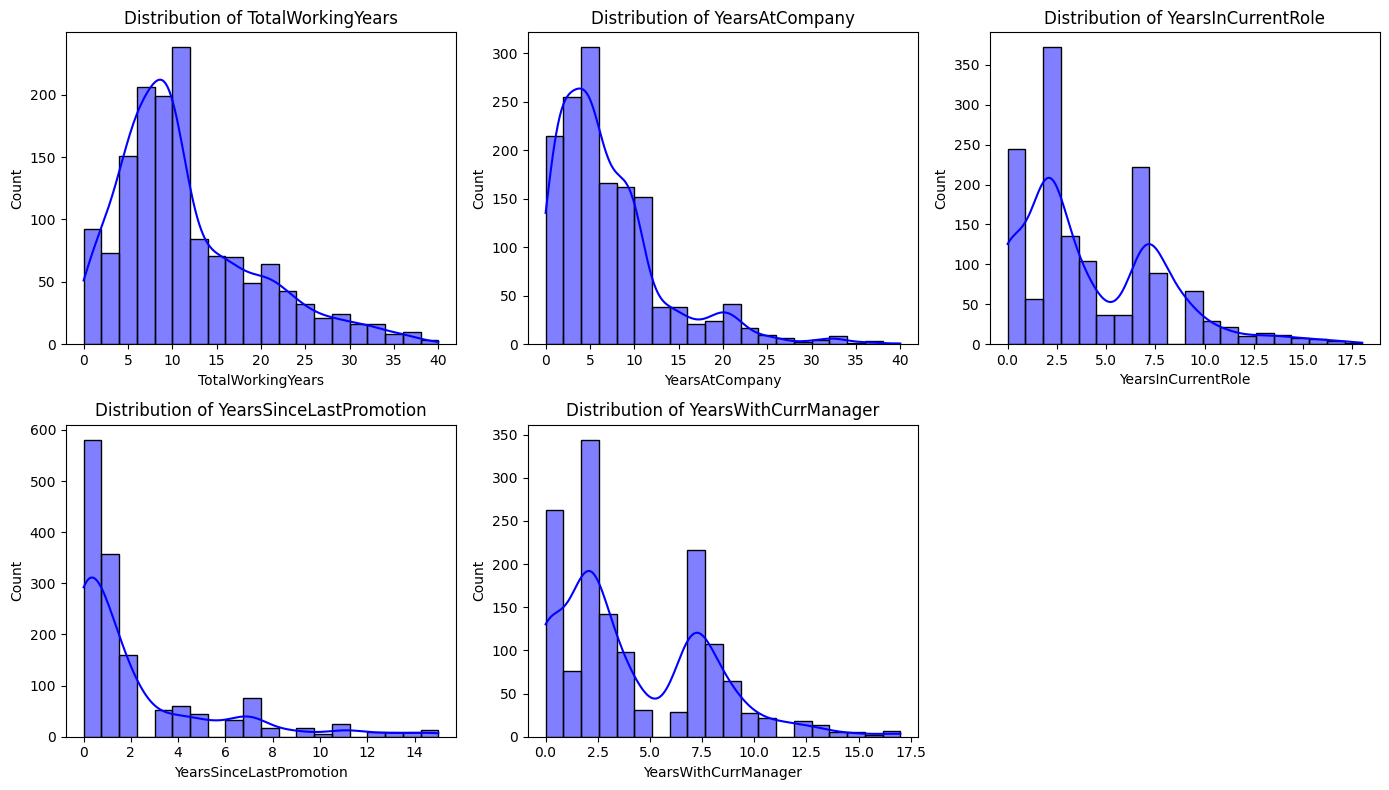

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temporal Features Available in Dataset
temporal_features = ["TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

# Set figure size for better readability
plt.figure(figsize=(14, 8))

# Plot distributions of temporal features
for i, feature in enumerate(temporal_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=20, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

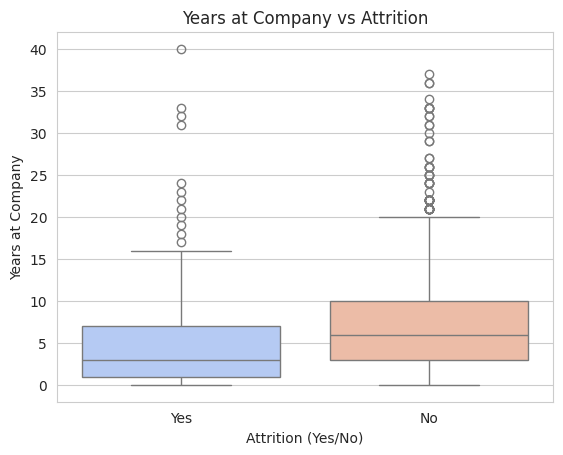

In [15]:
# Aggregated patterns: Attrition vs Years at Companyplt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="YearsAtCompany", hue="Attrition", data=df, palette="coolwarm", legend=False)
plt.title("Years at Company vs Attrition")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Years at Company")
plt.show()

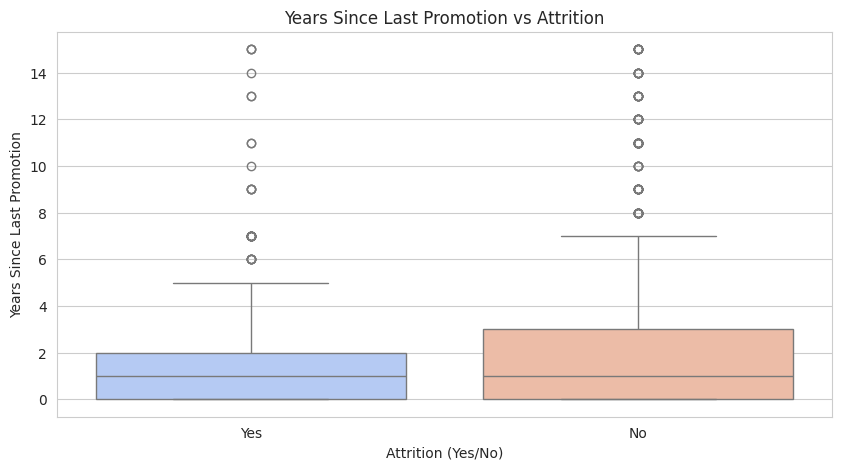

In [16]:
# Promotion Trend Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", hue="Attrition", data=df, palette="coolwarm", legend=False)
plt.title("Years Since Last Promotion vs Attrition")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Years Since Last Promotion")
plt.show()


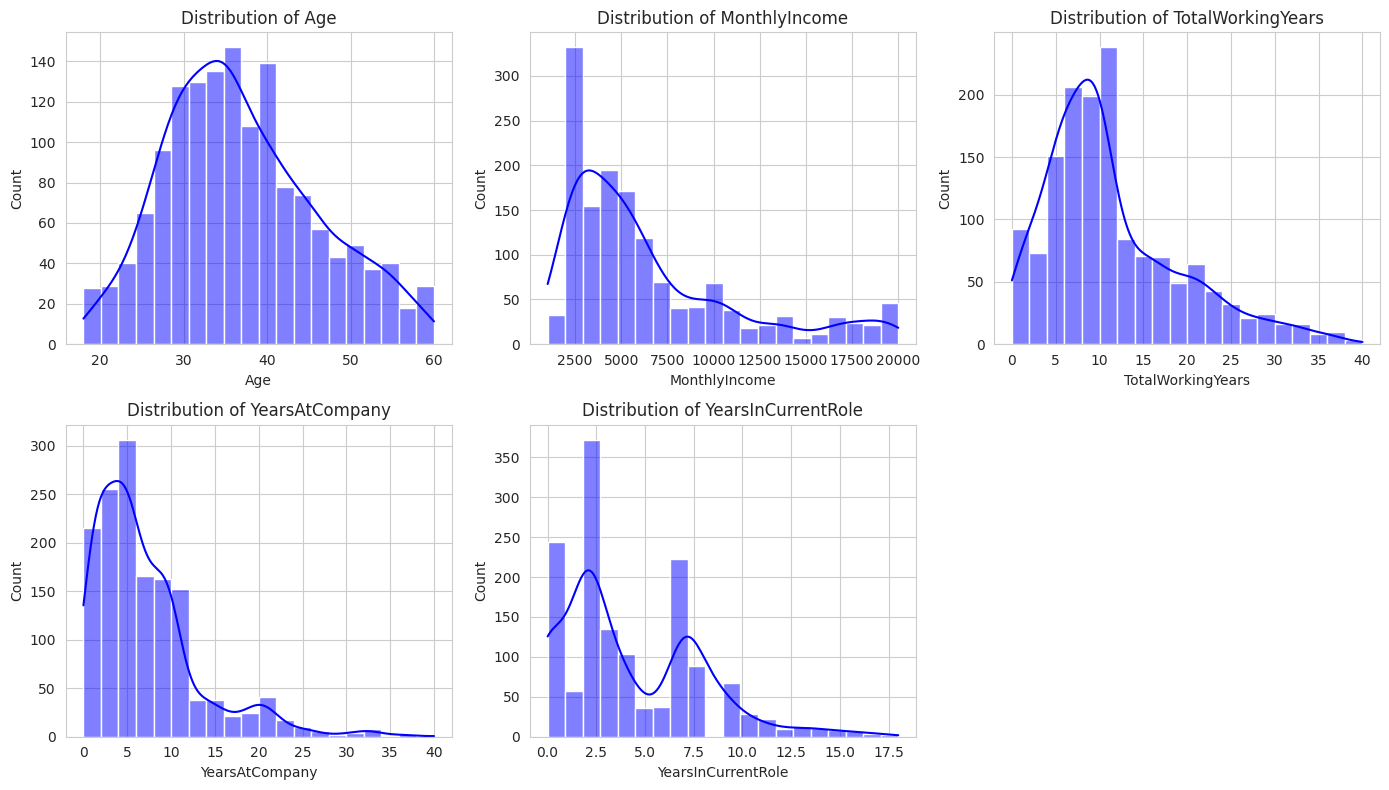


### Potential Machine Learning Problems:
1️⃣ **Employee Attrition Prediction (Classification):** 
   - Predict whether an employee is likely to leave based on features like salary, years at company, and promotions.

2️⃣ **Salary Prediction (Regression):** 
   - Predict an employee’s salary based on experience, education, and job role.

3️⃣ **Promotion Eligibility (Classification):** 
   - Predict whether an employee is likely to be promoted based on tenure, performance, and past promotions.



In [17]:
# Generate distribution plots for key numerical features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Select relevant numerical features for distribution analysis
numerical_features = ["Age", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole"]

# Create subplots for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=20, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Identify potential Machine Learning Problems
ml_problem_statement = """
### Potential Machine Learning Problems:
1️⃣ **Employee Attrition Prediction (Classification):** 
   - Predict whether an employee is likely to leave based on features like salary, years at company, and promotions.

2️⃣ **Salary Prediction (Regression):** 
   - Predict an employee’s salary based on experience, education, and job role.

3️⃣ **Promotion Eligibility (Classification):** 
   - Predict whether an employee is likely to be promoted based on tenure, performance, and past promotions.
"""

print(ml_problem_statement)

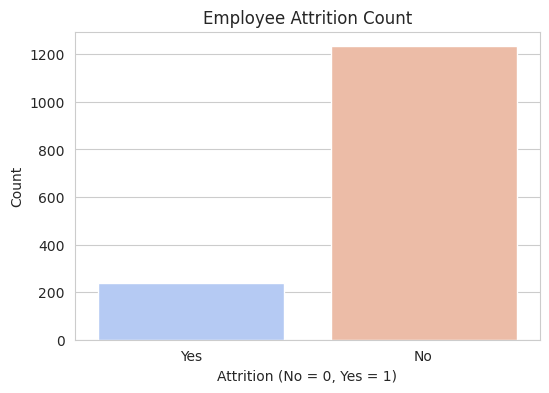

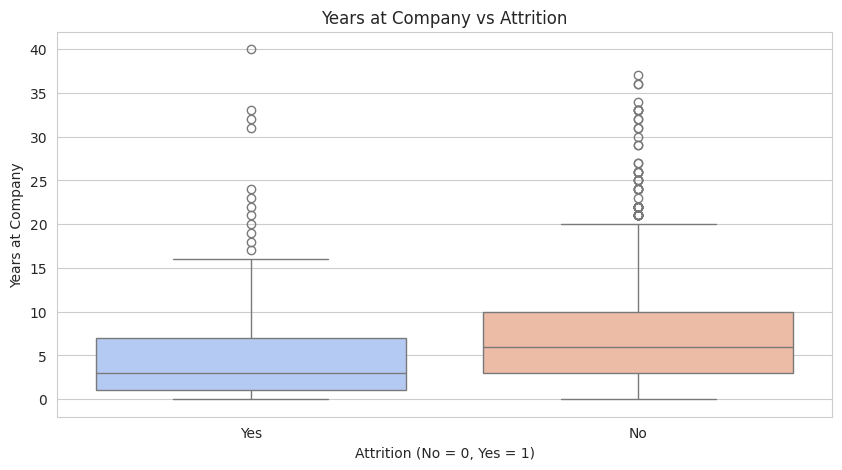

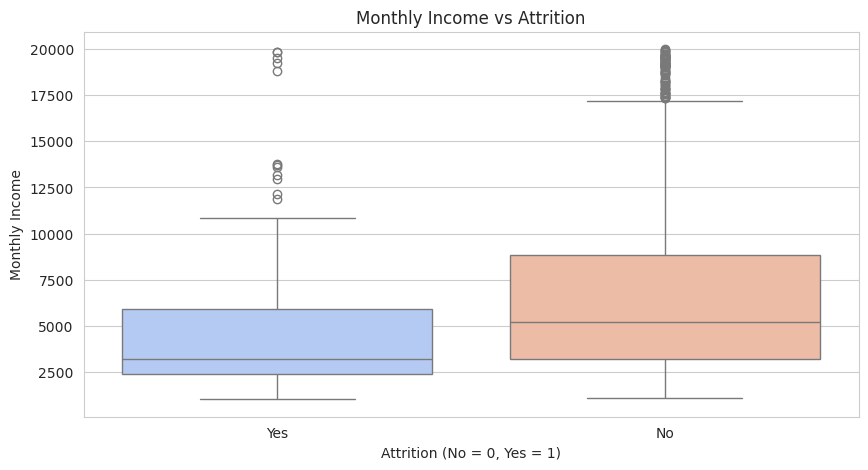

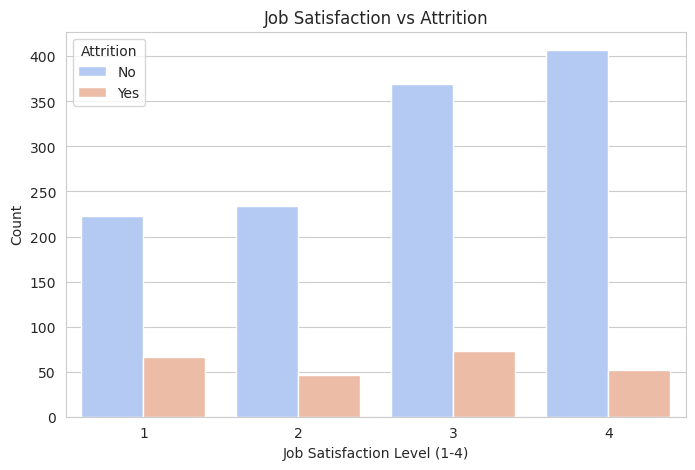

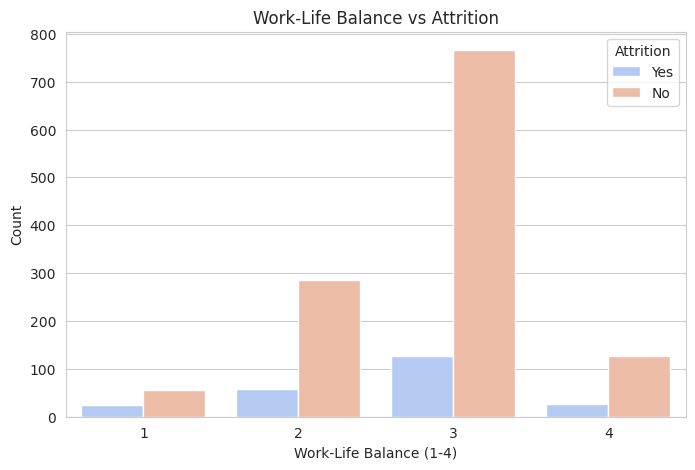

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1️⃣ Attrition Count Plot (Fixed)
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition", data=df, hue="Attrition", palette="coolwarm", legend=False)
plt.title("Employee Attrition Count")
plt.xlabel("Attrition (No = 0, Yes = 1)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Years at Company vs. Attrition (Fixed)
plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="YearsAtCompany", hue="Attrition", data=df, palette="coolwarm", legend=False)
plt.title("Years at Company vs Attrition")
plt.xlabel("Attrition (No = 0, Yes = 1)")
plt.ylabel("Years at Company")
plt.show()

# 3️⃣ Monthly Income vs. Attrition (Fixed)
plt.figure(figsize=(10, 5))
sns.boxplot(x="Attrition", y="MonthlyIncome", hue="Attrition", data=df, palette="coolwarm", legend=False)
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition (No = 0, Yes = 1)")
plt.ylabel("Monthly Income")
plt.show()

# 4️⃣ Job Satisfaction vs Attrition (Fixed)
plt.figure(figsize=(8, 5))
sns.countplot(x="JobSatisfaction", data=df, hue="Attrition", palette="coolwarm")
plt.title("Job Satisfaction vs Attrition")
plt.xlabel("Job Satisfaction Level (1-4)")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()

# 5️⃣ Work-Life Balance vs Attrition (Fixed)
plt.figure(figsize=(8, 5))
sns.countplot(x="WorkLifeBalance", data=df, hue="Attrition", palette="coolwarm")
plt.title("Work-Life Balance vs Attrition")
plt.xlabel("Work-Life Balance (1-4)")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()